<center> <h3>CS512 Computer Vision – Project</h3> </center>
<center> <h1>LYT-Net: Lightweight YUV Transformer-based Network for Low-Light Image Enhancement</h1> </center>
<center> (Dataset - LOL v1) </center>

##### Team Members:
- Tamilarasee Sethuraj (A20553416)
- Kavin Raj Karuppusamy Ramasamy (A20564249)

##### Research Paper:
```
Title   : LYT-Net: Lightweight YUV Transformer-based Network for Low-Light Image Enhancement
Authors : Alexandru Brateanu, Raul Balmez, Adrian Avram, Ciprian Orhei, and Cosmin Ancuti
Year    : 2024
Link    : https://arxiv.org/abs/2401.15204
```


In [ ]:
# Automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

In [ ]:
import os
from pathlib import Path

# get the dataset paths
data_folder_path = Path().absolute().parent / 'data'

dataset_path = data_folder_path / 'LOLv1'

train_input_path = dataset_path / 'Train' / 'input'
train_target_path = dataset_path / 'Train' / 'target'

test_input_path = dataset_path / 'Test' / 'input'
test_target_path = dataset_path / 'Test' / 'target'

# list the number of train and test images in the dataset

print('Train images:', len(os.listdir(train_input_path)))
print('Test images:', len(os.listdir(test_input_path)))


Train images: 485
Test images: 15


In [ ]:
from data_preparation import *

# Preprocess the dataset
train_dataset = preprocess_dataset(train_input_path, train_target_path)
test_dataset = preprocess_dataset(test_input_path, test_target_path)

train_dataset, val_dataset = split_dataset(train_dataset)



Found 485 files.
Found 485 files.
Found 15 files.
Found 15 files.


Train images - 388 
Validation images - 97 
Test images - 15 


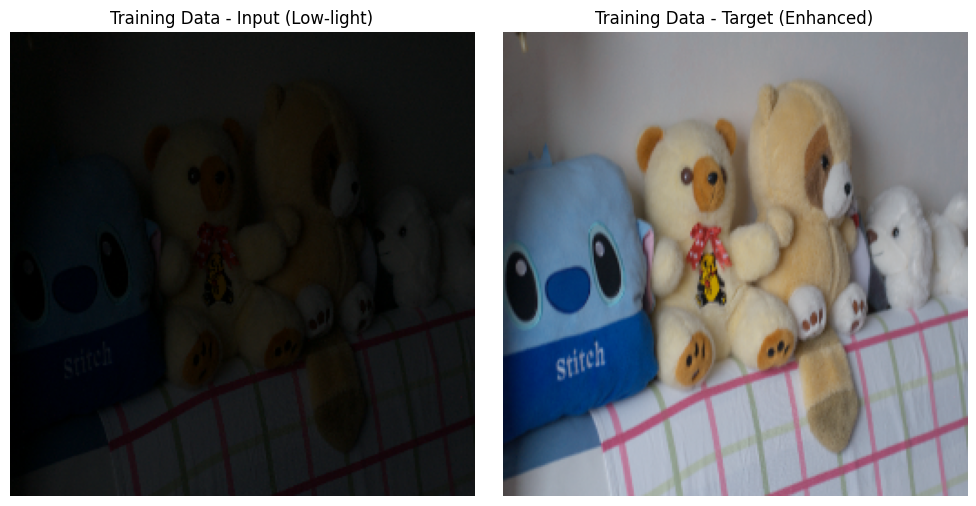

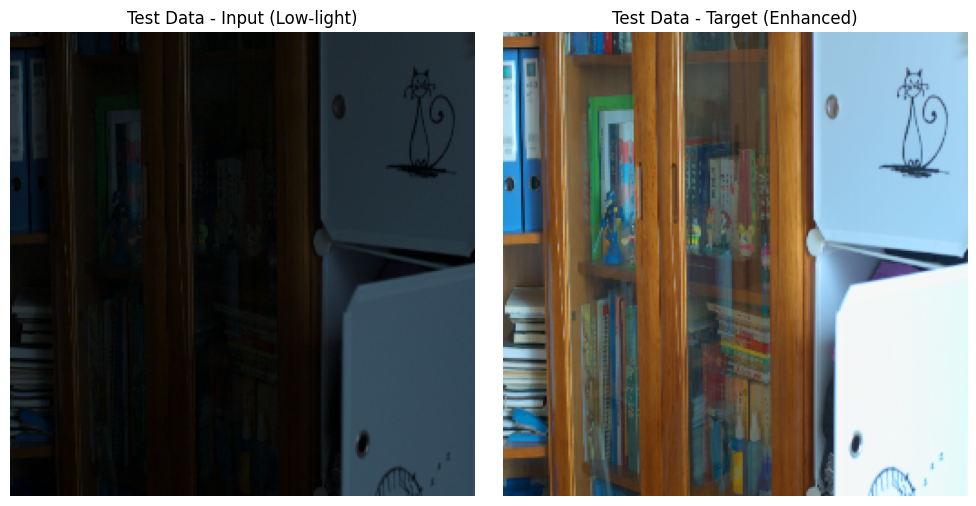

In [ ]:
print(f"Train images - {len(train_dataset)} ")
print(f"Validation images - {len(val_dataset)} ")
print(f"Test images - {len(test_dataset)} ")

plot_sample_image(train_dataset, "Training Data")
plot_sample_image(test_dataset, "Test Data")

In [ ]:
for input_images, target_images in train_dataset.take(1):
    print(input_images[0].shape)


import lyt_model


input_shape = (256,256,3)
batch_size = 1

# Build the model and print summary
lyt = lyt_model.LYT(input_shape)
lyt.summary()


(256, 256, 3)



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ [(None, 256, 256, │          0 │ input_layer[0][0] │
│                     │ 1), (None, 256,   │            │                   │
│                     │ 256, 1), (None,   │            │                   │
│                     │ 256, 256, 1)]     │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │        160 │ lambda[0][1]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 256, 256,  │        160 │ lambda[0][2]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      2,320 │ conv2d_2[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 128, 128,  │      2,320 │ conv2d_9[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │      2,320 │ conv2d_3[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 64, 64,    │      2,320 │ conv2d_10[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │      2,320 │ conv2d_4[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │      2,320 │ conv2d_11[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32, 32,    │        272 │ conv2d_5[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32, 32,    │        272 │ conv2d_5[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 32, 32,    │        272 │ conv2d_12[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 32, 32,    │        272 │ conv2d_12[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_10 (Lambda)  │ (None, 32, 32, 4) │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_11 (Lambda)  │ (None, 32, 32, 4) │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_19 (Lambda)  │ (None, 32, 32, 4) │          0 │ dense_8[0][0]   

 Total params: 54,139 (211.48 KB)

 Trainable params: 54,139 (211.48 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from loss import *
import tensorflow as tf

# metrics to be tracked
def PSNR(y_true, y_pred):
    return 40 - psnr_loss(y_true, y_pred)

def SSIM(y_true, y_pred):
    return 1 - ms_ssim_loss(y_true, y_pred)

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)


In [8]:
lyt.compile(optimizer=optimizer, loss=hybrid_loss, metrics=[PSNR, SSIM])

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_lyt_model.keras',
    save_best_only=True,
    monitor='val_psnr',
    mode='max',
    verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Fit the model
history = lyt.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10, 
    callbacks=[checkpoint_callback, early_stopping]
)

Epoch 1/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 1892.8925 - psnr: 11.5919 - ssim: 0.6859
Epoch 1: val_psnr improved from -inf to 16.81378, saving model to best_lyt_model.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 2271s 6s/step - loss: 1891.3799 - psnr: 11.6017 - ssim: 0.6862 - val_loss: 663.1838 - val_psnr: 16.8138 - val_ssim: 0.9091
Epoch 2/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 739.0184 - psnr: 17.7322 - ssim: 0.8947
Epoch 2: val_psnr did not improve from 16.81378
388/388 ━━━━━━━━━━━━━━━━━━━━ 2293s 6s/step - loss: 738.8948 - psnr: 17.7339 - ssim: 0.8947 - val_loss: 526.4299 - val_psnr: 16.3918 - val_ssim: 0.9189
Epoch 3/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 53s/step - loss: 617.2226 - psnr: 18.1654 - ssim: 0.9111 
Epoch 3: val_psnr improved from 16.81378 to 17.12070, saving model to best_lyt_model.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 20831s 54s/step - loss: 617.1368 - psnr: 18.1673 - ssim: 0.9111 - val_loss: 470.4036 - val_psnr: 17.1207 - val_ssim: 0.9279
Epoch 4/10
388/388

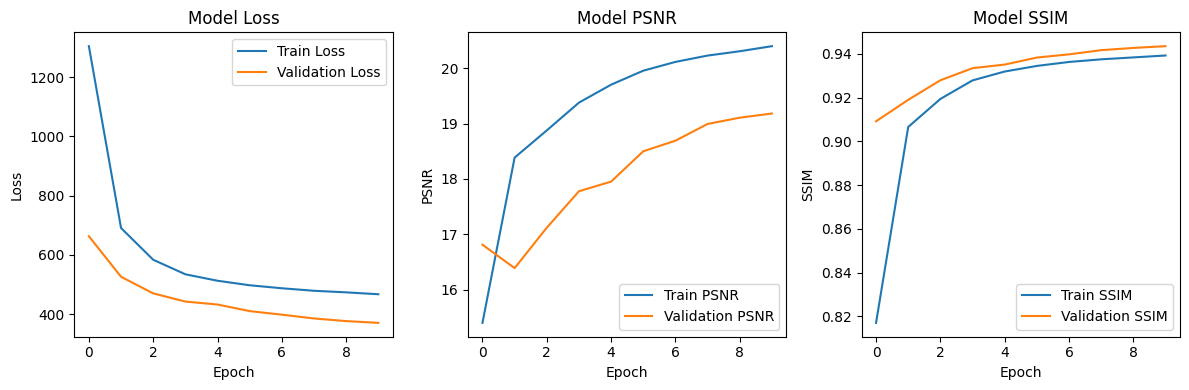

In [10]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['psnr'], label='Train PSNR')
plt.plot(history.history['val_psnr'], label='Validation PSNR')
plt.title('Model PSNR')
plt.xlabel('Epoch')
plt.ylabel('PSNR')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['ssim'], label='Train SSIM')
plt.plot(history.history['val_ssim'], label='Validation SSIM')
plt.title('Model SSIM')
plt.xlabel('Epoch')
plt.ylabel('SSIM')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
predictions = lyt.predict(test_dataset)

15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step


Average PSNR - LOLv1: 19.69
Average SSIM - LOLv1: 0.7854


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


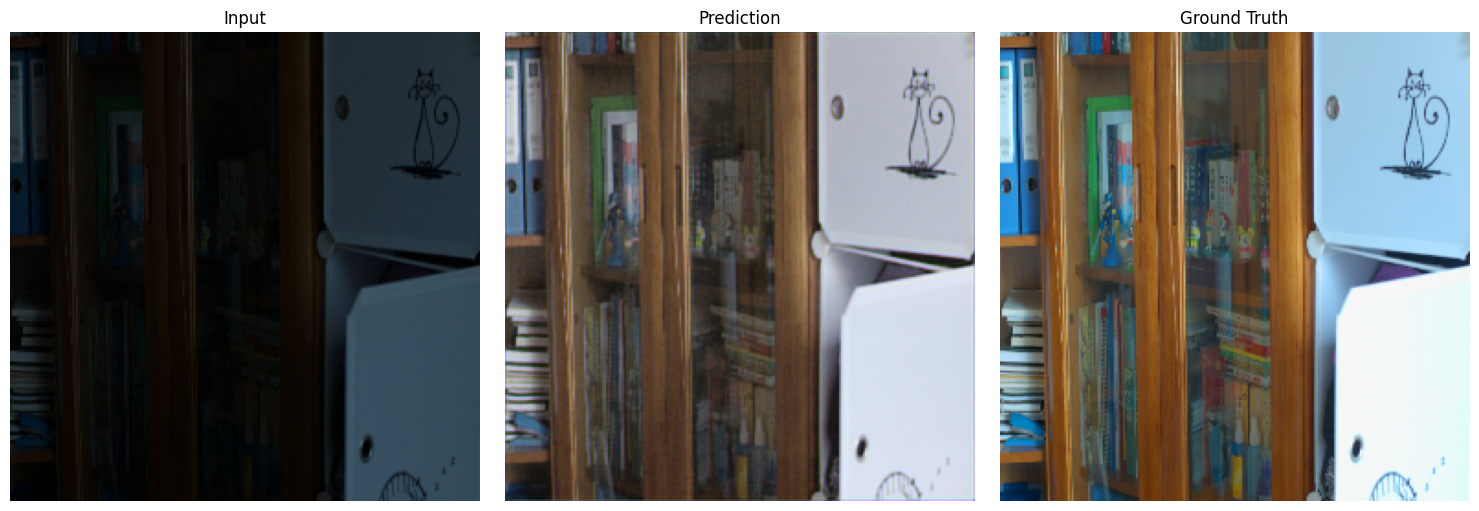

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


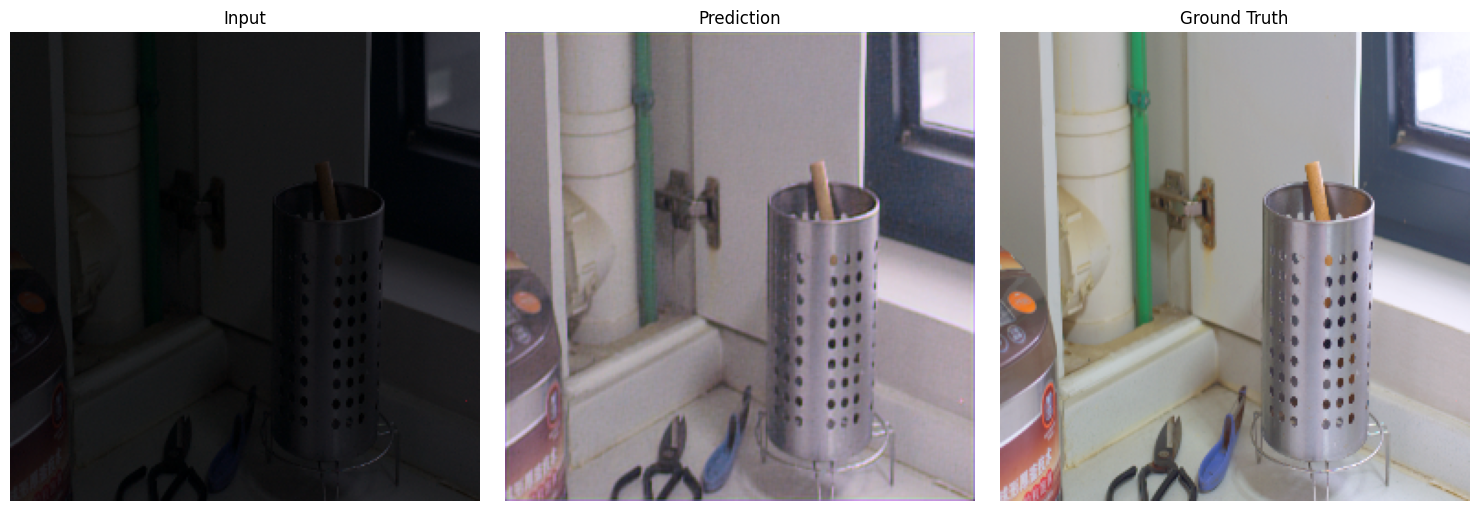

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


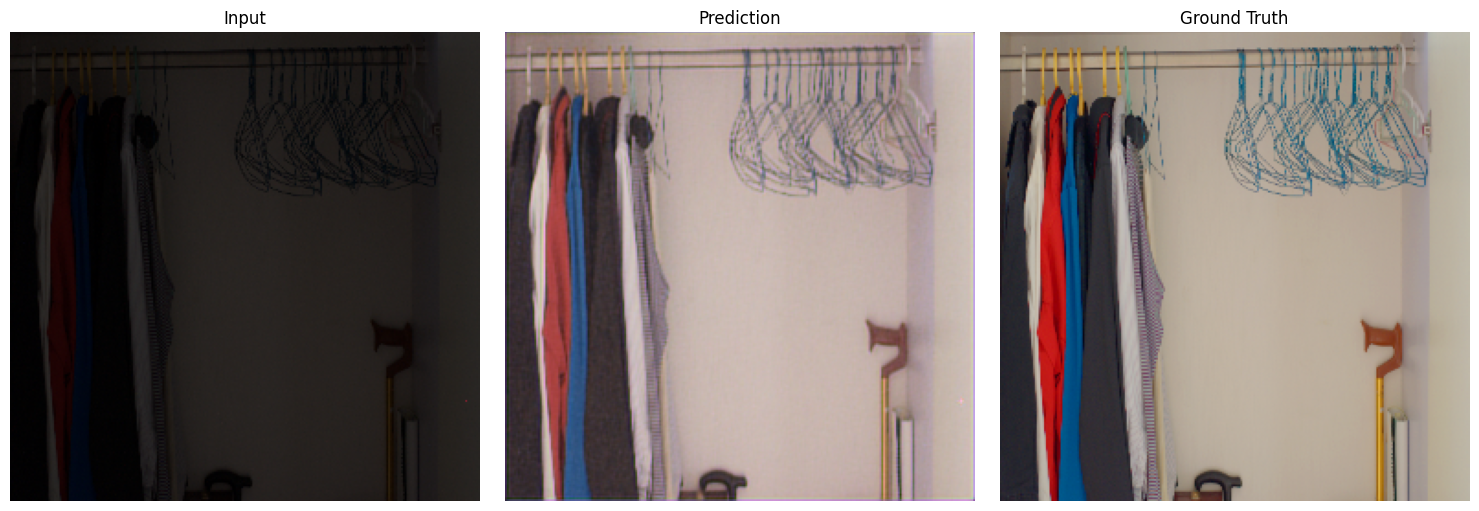

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Lists to store PSNR and SSIM values
psnr_values = []
ssim_values = []

for idx, (inputs, ground_truth) in enumerate(test_dataset):
    input_image = inputs[0].numpy()
    predicted_image = predictions[idx]
    ground_truth_image = ground_truth[0].numpy()

    # Calculate PSNR
    psnr = tf.image.psnr(ground_truth_image, predicted_image, max_val=1.0)
    psnr_values.append(psnr.numpy())

    # Calculate SSIM
    ssim = tf.image.ssim(ground_truth_image, predicted_image, max_val=1.0)
    ssim_values.append(ssim.numpy())

# Print average PSNR and SSIM
print(f"Average PSNR - LOLv1: {np.mean(psnr_values):.2f}")
print(f"Average SSIM - LOLv1: {np.mean(ssim_values):.4f}")

for idx, (inputs, ground_truth) in enumerate(test_dataset.take(3)):
    input_image = inputs[0].numpy()
    predicted_image = predictions[idx]
    ground_truth_image = ground_truth[0].numpy()

    plt.figure(figsize=(15, 5))
       
    plt.subplot(1, 3, 1)
    plt.imshow(input_image)
    plt.title('Input')
    plt.axis('off')
        
    plt.subplot(1, 3, 2)
    plt.imshow(predicted_image)
    plt.title(f'Prediction')
    plt.axis('off')
        
    plt.subplot(1, 3, 3)
    plt.imshow(ground_truth_image)
    plt.title(f'Ground Truth')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()